# 16. Multiple chart from SQL data

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import style
import os
style.use('fivethirtyeight')

In [2]:
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=BDPRADA.LACAISSE.COM;"
                      "Database=ADA_BETA;"
                      "Trusted_Connection=yes;")

df = pd.read_sql_query('SELECT * FROM [sandbox_analyse_quantitative].[Swaption_v1]',cnxn)

In [3]:
df.vDate = pd.to_datetime(df.vDate)
df['ccy'] = df.ccy.astype('category', categories = ['USD','EUR'], ordered =True)
df['expiry'] = df.expiry.astype('category', categories = [ '01M', '03M','06M','01Y','02Y'], ordered =True)
df['tenor'] = df.tenor.astype('category', categories = [ '02Y', '05Y', '10Y', '30Y'], ordered =True)
df['relative_strike'] = pd.to_numeric(df.relative_strike)
df.dtypes

RIC                        object
ccy                      category
expiry                   category
tenor                    category
relative_strike             int64
vDate              datetime64[ns]
Norm_Vol_JPM              float64
Norm_Vol_TP               float64
Norm_vol_Citi             float64
dtype: object

In [4]:
df.sort_values(['ccy','expiry','tenor','relative_strike','vDate'],inplace=True)
df = df.reset_index(drop = True)
df.head()

,RIC,ccy,expiry,tenor,relative_strike,vDate,Norm_Vol_JPM,Norm_Vol_TP,Norm_vol_Citi
0,SSSR1USD01M02Y,USD,01M,02Y,-100,2000-01-03,96.658608,NaN,NaN
1,SSSR1USD01M02Y,USD,01M,02Y,-100,2000-01-04,97.098015,NaN,NaN
2,SSSR1USD01M02Y,USD,01M,02Y,-100,2000-01-05,100.725816,NaN,NaN
3,SSSR1USD01M02Y,USD,01M,02Y,-100,2000-01-06,100.693591,NaN,NaN
4,SSSR1USD01M02Y,USD,01M,02Y,-100,2000-01-07,99.104076,NaN,NaN


## Plot

In [5]:
ccy = list(df.ccy.unique())
expiry = list(df.expiry.unique().sort_values())
tenor = list(df.tenor.unique().sort_values())
relative_strike = sorted(df.relative_strike.unique().tolist())

In [6]:
for i in ccy:
    for j in expiry:
        for k in tenor:
            for ii in relative_strike:
                curSeries = df.loc[(df.ccy == i) & (df.expiry == j) & (df.tenor == k) & (df.relative_strike == ii),:]
     
                plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')

                ax1 = plt.subplot2grid((6,6), (0,0), rowspan = 5, colspan =4)
                ax2 = plt.subplot2grid((6,6), (0,5), rowspan = 1, colspan =1)
                ax3 = plt.subplot2grid((6,6), (1,5), rowspan = 1, colspan =1)
                ax4 = plt.subplot2grid((6,6), (2,5), rowspan = 1, colspan =1)
                ax5 = plt.subplot2grid((6,6), (3,5), rowspan = 1, colspan =1)
                ax6 = plt.subplot2grid((6,6), (4,5), rowspan = 1, colspan =1)


                #AX1---------------------------------------------
                x = curSeries.vDate
                y1 = curSeries.Norm_Vol_JPM
                y2 = curSeries.Norm_Vol_TP
                y3 = curSeries.Norm_vol_Citi


                ax1.plot(x,y1, label = 'Norm_Vol_JPM')
                ax1.plot(x,y2, label = 'Norm_Vol_TP')
                ax1.plot(x,y3, label = 'Norm_Vol_Citi')

                #AX2---------------------------------------------

                expiry1M = np.zeros((len(relative_strike),len(tenor)))
                if j == '01M':
                    expiry1M[relative_strike.index(ii), tenor.index(k)] = 1

                ax2.pcolor(expiry1M, edgecolors = 'k', linewidths = 2)

                ax2.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
                ax2.set_xticks([.5, 1.5, 2.5, 3.5])
                ax2.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
                ax2.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
                ax2.set_ylabel('01M')

                #AX3---------------------------------------------

                expiry3M = np.zeros((len(relative_strike),len(tenor)))
                if j == '03M':
                    expiry3M[relative_strike.index(ii), tenor.index(k)] = 1

                ax3.pcolor(expiry3M, edgecolors = 'k', linewidths = 2)

                ax3.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
                ax3.set_xticks([.5, 1.5, 2.5, 3.5])
                ax3.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
                ax3.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
                ax3.set_ylabel('03M')

                #AX4---------------------------------------------

                expiry6M = np.zeros((len(relative_strike),len(tenor)))
                if j == '06M':
                    expiry6M[relative_strike.index(ii), tenor.index(k)] = 1

                ax4.pcolor(expiry6M, edgecolors = 'k', linewidths = 2)

                ax4.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
                ax4.set_xticks([.5, 1.5, 2.5, 3.5])
                ax4.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
                ax4.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
                ax4.set_ylabel('06M')

                #AX5---------------------------------------------

                expiry1Y = np.zeros((len(relative_strike),len(tenor)))
                if j == '01Y':
                    expiry1Y[relative_strike.index(ii), tenor.index(k)] = 1

                ax5.pcolor(expiry1Y, edgecolors = 'k', linewidths = 2)

                ax5.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
                ax5.set_xticks([.5, 1.5, 2.5, 3.5])
                ax5.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
                ax5.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
                ax5.set_ylabel('01Y')

                #AX6---------------------------------------------

                expiry2Y = np.zeros((len(relative_strike),len(tenor)))
                if j == '02Y':
                    expiry2Y[relative_strike.index(ii), tenor.index(k)] = 1

                ax6.pcolor(expiry2Y, edgecolors = 'k', linewidths = 2)

                ax6.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
                ax6.set_xticks([.5, 1.5, 2.5, 3.5])
                ax6.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
                ax6.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
                ax6.set_ylabel('02Y')

                #Save Plot-----------------------------------------
                sPath = (r'C:\Users\fella\Desktop\Documents\2.One time\Demande\Tekogan\Swaption\SwaptionPlot')
                os.path.join(sPath, pTitle+'.png')  
                plt.savefig(os.path.join(sPath, pTitle+'.png'))

                #plt.show()


NameError: name 'pTitle' is not defined

In [ ]:
curSeries.Norm_vol_Citi

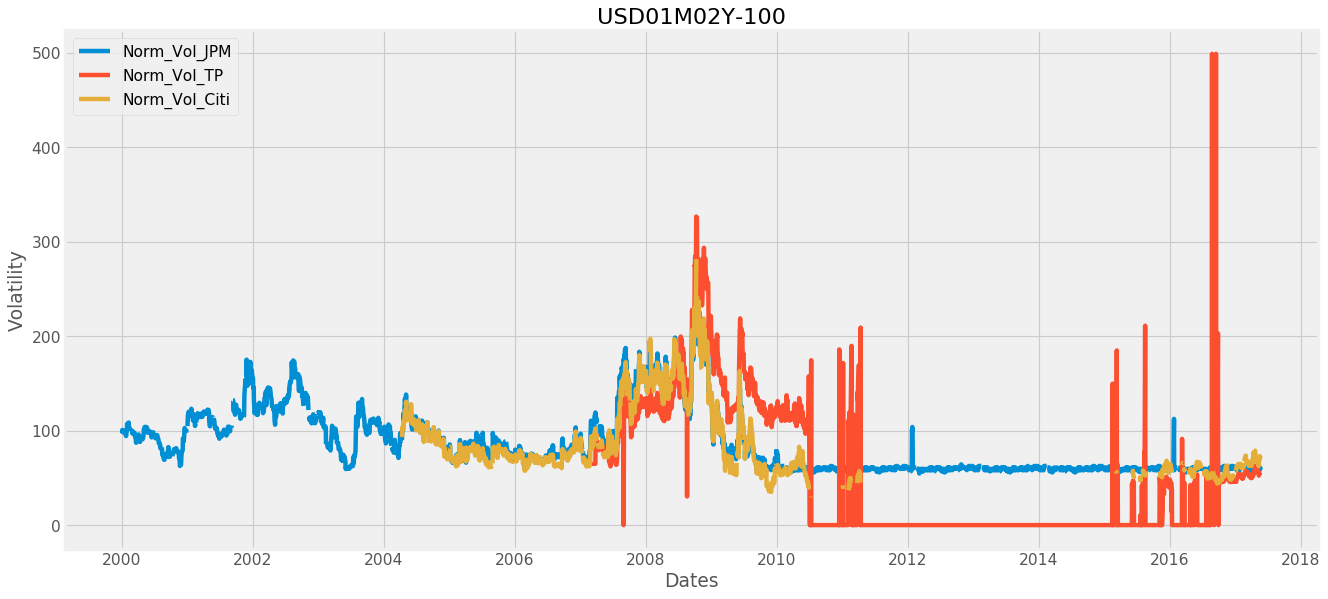

In [147]:
i = 'USD'
j = '01M'
k = '02Y'
ii = -100


curSeries = df.loc[(df.ccy == i) & (df.expiry == j) & (df.tenor == k) & (df.relative_strike == ii),:]

pTitle = str(i + j + k + str(ii))
x = curSeries.vDate
y1 = curSeries.Norm_Vol_JPM
y2 = curSeries.Norm_Vol_TP
y3 = curSeries.Norm_vol_Citi

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(x,y1, label = 'Norm_Vol_JPM')
plt.plot(x,y2, label = 'Norm_Vol_TP')
plt.plot(x,y3, label = 'Norm_Vol_Citi')
plt.xlabel('Dates')
plt.ylabel('Volatility')

plt.title(pTitle)
plt.legend()
sPath = (r'C:\Users\fella\Desktop\Documents\2.One time\Demande\Tekogan\Swaption\SwaptionPlot')
os.path.join(sPath, pTitle+'.png')  
plt.savefig(os.path.join(sPath, pTitle+'.png'))
plt.show()



In [ ]:
#data
#---------------------
#constant
i = 'USD'
j = '01M'
k = '02Y'
ii = -100

#series
curSeries = df.loc[(df.ccy == i) & (df.expiry == j) & (df.tenor == k) & (df.relative_strike == ii),:]

#variables
x = curSeries.vDate
y1 = curSeries.Norm_Vol_JPM
y2 = curSeries.Norm_Vol_TP
y3 = curSeries.Norm_vol_Citi

#first plot
pTitle = str(i + j + k + str(ii))
plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')


plt.plot(x,y1, label = 'Norm_Vol_JPM')
plt.plot(x,y2, label = 'Norm_Vol_TP')
plt.plot(x,y3, label = 'Norm_Vol_Citi')
plt.xlabel('Dates')
plt.ylabel('Volatility')

plt.title(pTitle)
plt.legend()
sPath = (r'C:\Users\fella\Desktop\Documents\2.One time\Demande\Tekogan\Swaption\SwaptionPlot')
os.path.join(sPath, pTitle+'.png')  
plt.savefig(os.path.join(sPath, pTitle+'.png'))
plt.show()


In [158]:
def create_plots():
    xs = []
    ys = []
    
    for i in range(10):
        x = i
        y = random.randrange(10)
        
        xs.append(x)
        ys.append(y)
    return xs, ys

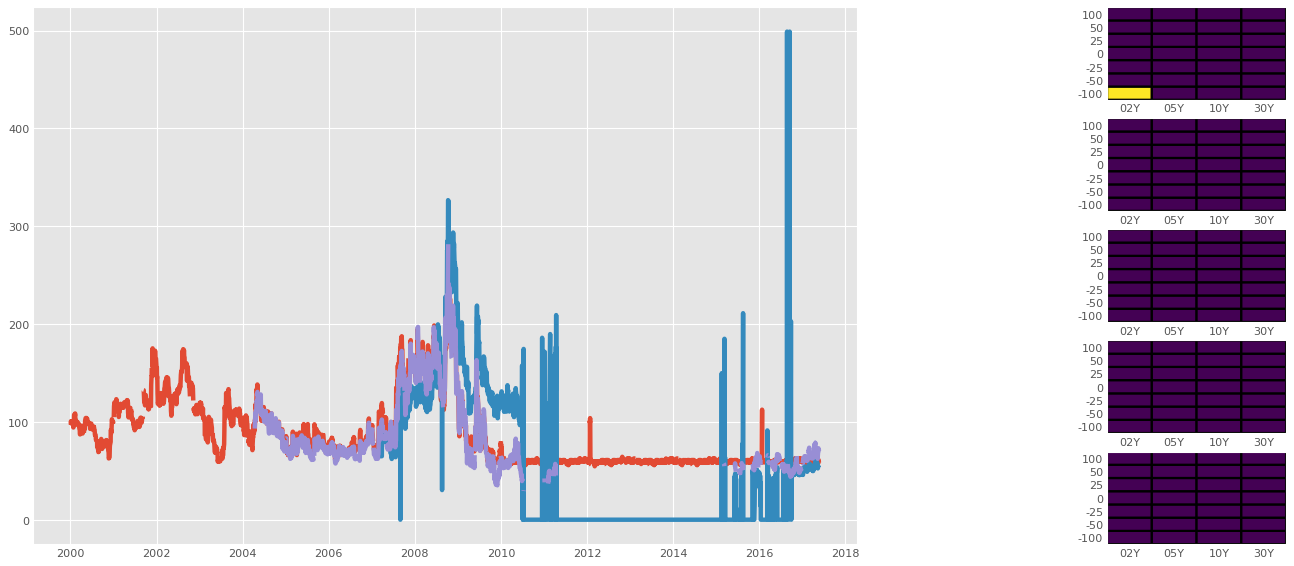

In [245]:
plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot2grid((6,6), (0,0), rowspan = 5, colspan =4)
ax2 = plt.subplot2grid((6,6), (0,5), rowspan = 1, colspan =1)
ax3 = plt.subplot2grid((6,6), (1,5), rowspan = 1, colspan =1)
ax4 = plt.subplot2grid((6,6), (2,5), rowspan = 1, colspan =1)
ax5 = plt.subplot2grid((6,6), (3,5), rowspan = 1, colspan =1)
ax6 = plt.subplot2grid((6,6), (4,5), rowspan = 1, colspan =1)

#AX1---------------------------------------------
x = curSeries.vDate
y1 = curSeries.Norm_Vol_JPM
y2 = curSeries.Norm_Vol_TP
y3 = curSeries.Norm_vol_Citi


ax1.plot(x,y1, label = 'Norm_Vol_JPM')
ax1.plot(x,y2, label = 'Norm_Vol_TP')
ax1.plot(x,y3, label = 'Norm_Vol_Citi')

#AX2---------------------------------------------

expiry1M = np.zeros((len(relative_strike),len(tenor)))
if j == '01M':
    expiry1M[relative_strike.index(ii), tenor.index(k)] = 1

ax2.pcolor(expiry1M, edgecolors = 'k', linewidths = 2)

ax2.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax2.set_xticks([.5, 1.5, 2.5, 3.5])
ax2.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax2.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])


#AX3---------------------------------------------

expiry3M = np.zeros((len(relative_strike),len(tenor)))
if j == '03M':
    expiry3M[relative_strike.index(ii), tenor.index(k)] = 1

ax3.pcolor(expiry3M, edgecolors = 'k', linewidths = 2)

ax3.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax3.set_xticks([.5, 1.5, 2.5, 3.5])
ax3.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax3.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])


#AX4---------------------------------------------

expiry6M = np.zeros((len(relative_strike),len(tenor)))
if j == '06M':
    expiry6M[relative_strike.index(ii), tenor.index(k)] = 1

ax4.pcolor(expiry6M, edgecolors = 'k', linewidths = 2)

ax4.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax4.set_xticks([.5, 1.5, 2.5, 3.5])
ax4.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax4.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

#AX5---------------------------------------------

expiry1Y = np.zeros((len(relative_strike),len(tenor)))
if j == '01Y':
    expiry1Y[relative_strike.index(ii), tenor.index(k)] = 1

ax5.pcolor(expiry1Y, edgecolors = 'k', linewidths = 2)

ax5.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax5.set_xticks([.5, 1.5, 2.5, 3.5])
ax5.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax5.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])


#AX6---------------------------------------------

expiry2Y = np.zeros((len(relative_strike),len(tenor)))
if j == '02Y':
    expiry2Y[relative_strike.index(ii), tenor.index(k)] = 1

ax6.pcolor(expiry2Y, edgecolors = 'k', linewidths = 2)

ax6.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax6.set_xticks([.5, 1.5, 2.5, 3.5])
ax6.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax6.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])




plt.show()

In [215]:
tenor.index(k)
relative_strike.index(ii)

0

In [185]:
expiry1M = np.zeros((len(tenor), len(relative_strike)))
expiry1M[tenor.index(k), relative_strike.index(ii)] = 1
expiry1M

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [209]:
expiry1M = np.zeros((len(relative_strike),len(tenor)))
expiry1M[relative_strike.index(ii), tenor.index(k)] = 1

ax2.pcolor(expiry1M, edgecolors = 'k', linewidths = 2)

labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']
#ax2.sca(axes[1, 1])
#ax2.set_xticks(x, labels)#, rotation='vertical')
#ax2.margins(0.2)
ax2.set_xlabel('Tenor', fontsize = '10')
ax2.set_ylabel('Relative Strike', fontsize = '10')

ax2.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

In [229]:
relative_strike

[-100, -50, -25, 0, 25, 50, 100]

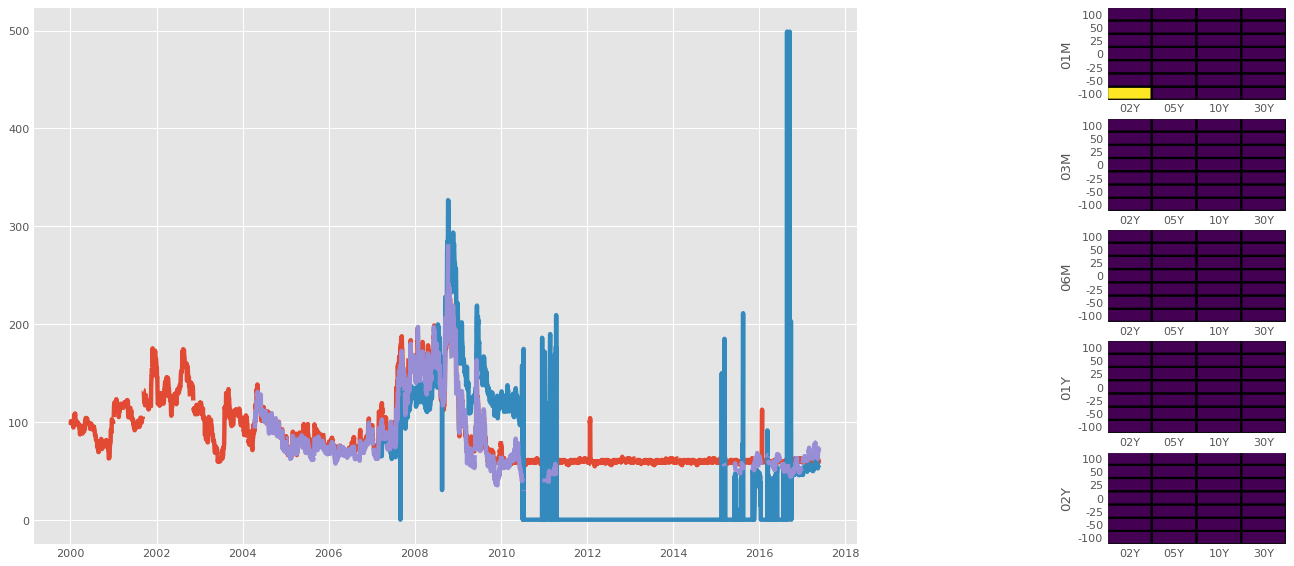

In [256]:
plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot2grid((6,6), (0,0), rowspan = 5, colspan =4)
ax2 = plt.subplot2grid((6,6), (0,5), rowspan = 1, colspan =1)
ax3 = plt.subplot2grid((6,6), (1,5), rowspan = 1, colspan =1)
ax4 = plt.subplot2grid((6,6), (2,5), rowspan = 1, colspan =1)
ax5 = plt.subplot2grid((6,6), (3,5), rowspan = 1, colspan =1)
ax6 = plt.subplot2grid((6,6), (4,5), rowspan = 1, colspan =1)


#AX1---------------------------------------------
x = curSeries.vDate
y1 = curSeries.Norm_Vol_JPM
y2 = curSeries.Norm_Vol_TP
y3 = curSeries.Norm_vol_Citi


ax1.plot(x,y1, label = 'Norm_Vol_JPM')
ax1.plot(x,y2, label = 'Norm_Vol_TP')
ax1.plot(x,y3, label = 'Norm_Vol_Citi')

#AX2---------------------------------------------

expiry1M = np.zeros((len(relative_strike),len(tenor)))
if j == '01M':
    expiry1M[relative_strike.index(ii), tenor.index(k)] = 1

ax2.pcolor(expiry1M, edgecolors = 'k', linewidths = 2)

ax2.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax2.set_xticks([.5, 1.5, 2.5, 3.5])
ax2.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax2.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
ax2.set_ylabel('01M')

#AX3---------------------------------------------

expiry3M = np.zeros((len(relative_strike),len(tenor)))
if j == '03M':
    expiry3M[relative_strike.index(ii), tenor.index(k)] = 1

ax3.pcolor(expiry3M, edgecolors = 'k', linewidths = 2)

ax3.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax3.set_xticks([.5, 1.5, 2.5, 3.5])
ax3.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax3.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
ax3.set_ylabel('03M')

#AX4---------------------------------------------

expiry6M = np.zeros((len(relative_strike),len(tenor)))
if j == '06M':
    expiry6M[relative_strike.index(ii), tenor.index(k)] = 1

ax4.pcolor(expiry6M, edgecolors = 'k', linewidths = 2)

ax4.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax4.set_xticks([.5, 1.5, 2.5, 3.5])
ax4.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax4.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
ax4.set_ylabel('06M')

#AX5---------------------------------------------

expiry1Y = np.zeros((len(relative_strike),len(tenor)))
if j == '01Y':
    expiry1Y[relative_strike.index(ii), tenor.index(k)] = 1

ax5.pcolor(expiry1Y, edgecolors = 'k', linewidths = 2)

ax5.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax5.set_xticks([.5, 1.5, 2.5, 3.5])
ax5.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax5.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
ax5.set_ylabel('01Y')

#AX6---------------------------------------------

expiry2Y = np.zeros((len(relative_strike),len(tenor)))
if j == '02Y':
    expiry2Y[relative_strike.index(ii), tenor.index(k)] = 1

ax6.pcolor(expiry2Y, edgecolors = 'k', linewidths = 2)

ax6.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax6.set_xticks([.5, 1.5, 2.5, 3.5])
ax6.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax6.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
ax6.set_ylabel('02Y')



plt.show()

In [7]:
i = 'USD'
j = '01M'
k = '02Y'

for k in tenor:
    for ii in relative_strike:
        curSeries = df.loc[(df.ccy == i) & (df.expiry == j) & (df.tenor == k) & (df.relative_strike == ii),:]

        plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')

        ax1 = plt.subplot2grid((6,6), (0,0), rowspan = 5, colspan =4)
        ax2 = plt.subplot2grid((6,6), (0,5), rowspan = 1, colspan =1)
        ax3 = plt.subplot2grid((6,6), (1,5), rowspan = 1, colspan =1)
        ax4 = plt.subplot2grid((6,6), (2,5), rowspan = 1, colspan =1)
        ax5 = plt.subplot2grid((6,6), (3,5), rowspan = 1, colspan =1)
        ax6 = plt.subplot2grid((6,6), (4,5), rowspan = 1, colspan =1)


        #AX1---------------------------------------------
        x = curSeries.vDate
        y1 = curSeries.Norm_Vol_JPM
        y2 = curSeries.Norm_Vol_TP
        y3 = curSeries.Norm_vol_Citi


        ax1.plot(x,y1, label = 'Norm_Vol_JPM')
        ax1.plot(x,y2, label = 'Norm_Vol_TP')
        ax1.plot(x,y3, label = 'Norm_Vol_Citi')

        pTitle = i+j+k+str(ii)
        ax1.set_title(pTitle)
        ax1.legend()
        #AX2---------------------------------------------

        expiry1M = np.zeros((len(relative_strike),len(tenor)))
        if j == '01M':
            expiry1M[relative_strike.index(ii), tenor.index(k)] = 1

        ax2.pcolor(expiry1M, edgecolors = 'k', linewidths = 2)

        ax2.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax2.set_xticks([.5, 1.5, 2.5, 3.5])
        ax2.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax2.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax2.set_ylabel('01M')

        #AX3---------------------------------------------

        expiry3M = np.zeros((len(relative_strike),len(tenor)))
        if j == '03M':
            expiry3M[relative_strike.index(ii), tenor.index(k)] = 1

        ax3.pcolor(expiry3M, edgecolors = 'k', linewidths = 2)

        ax3.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax3.set_xticks([.5, 1.5, 2.5, 3.5])
        ax3.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax3.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax3.set_ylabel('03M')

        #AX4---------------------------------------------

        expiry6M = np.zeros((len(relative_strike),len(tenor)))
        if j == '06M':
            expiry6M[relative_strike.index(ii), tenor.index(k)] = 1

        ax4.pcolor(expiry6M, edgecolors = 'k', linewidths = 2)

        ax4.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax4.set_xticks([.5, 1.5, 2.5, 3.5])
        ax4.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax4.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax4.set_ylabel('06M')

        #AX5---------------------------------------------

        expiry1Y = np.zeros((len(relative_strike),len(tenor)))
        if j == '01Y':
            expiry1Y[relative_strike.index(ii), tenor.index(k)] = 1

        ax5.pcolor(expiry1Y, edgecolors = 'k', linewidths = 2)

        ax5.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax5.set_xticks([.5, 1.5, 2.5, 3.5])
        ax5.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax5.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax5.set_ylabel('01Y')

        #AX6---------------------------------------------

        expiry2Y = np.zeros((len(relative_strike),len(tenor)))
        if j == '02Y':
            expiry2Y[relative_strike.index(ii), tenor.index(k)] = 1

        ax6.pcolor(expiry2Y, edgecolors = 'k', linewidths = 2)

        ax6.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax6.set_xticks([.5, 1.5, 2.5, 3.5])
        ax6.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax6.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax6.set_ylabel('02Y')


        #Save Plot-----------------------------------------
        sPath = (r'C:\Users\fella\Desktop\Documents\2.One time\Demande\Tekogan\Swaption\SwaptionPlot')
        os.path.join(sPath, pTitle+'.png')  
        plt.savefig(os.path.join(sPath, pTitle+'.png'))

    #    plt.show()
        plt.close('all')


In [12]:
i = 'USD'
j = '01M'
k = '02Y'

for k in tenor:
    for ii in relative_strike:
        curSeries = df.loc[(df.ccy == i) & (df.expiry == j) & (df.tenor == k) & (df.relative_strike == ii),:]

        plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')

        ax1 = plt.subplot2grid((6,6), (0,0), rowspan = 5, colspan =4)
        ax2 = plt.subplot2grid((6,6), (0,5), rowspan = 1, colspan =1)
        ax3 = plt.subplot2grid((6,6), (1,5), rowspan = 1, colspan =1)
        ax4 = plt.subplot2grid((6,6), (2,5), rowspan = 1, colspan =1)
        ax5 = plt.subplot2grid((6,6), (3,5), rowspan = 1, colspan =1)
        ax6 = plt.subplot2grid((6,6), (4,5), rowspan = 1, colspan =1)


        #AX1---------------------------------------------
        x = curSeries.vDate
        y1 = curSeries.Norm_Vol_JPM
        y2 = curSeries.Norm_Vol_TP
        y3 = curSeries.Norm_vol_Citi


        ax1.plot(x,y1, label = 'Norm_Vol_JPM')
        ax1.plot(x,y2, label = 'Norm_Vol_TP')
        ax1.plot(x,y3, label = 'Norm_Vol_Citi')

        pTitle = i+j+k+str(ii)
        ax1.set_title(pTitle)
        ax1.legend()
        #AX2---------------------------------------------

        expiry1M = np.zeros((len(relative_strike),len(tenor)))
        if j == '01M':
            expiry1M[relative_strike.index(ii), tenor.index(k)] = 1

        ax2.pcolor(expiry1M, edgecolors = 'k', linewidths = 2)

        ax2.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax2.set_xticks([.5, 1.5, 2.5, 3.5])
        ax2.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax2.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax2.set_ylabel('01M')

        #AX3---------------------------------------------

        expiry3M = np.zeros((len(relative_strike),len(tenor)))
        if j == '03M':
            expiry3M[relative_strike.index(ii), tenor.index(k)] = 1

        ax3.pcolor(expiry3M, edgecolors = 'k', linewidths = 2)

        ax3.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax3.set_xticks([.5, 1.5, 2.5, 3.5])
        ax3.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax3.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax3.set_ylabel('03M')

        #AX4---------------------------------------------

        expiry6M = np.zeros((len(relative_strike),len(tenor)))
        if j == '06M':
            expiry6M[relative_strike.index(ii), tenor.index(k)] = 1

        ax4.pcolor(expiry6M, edgecolors = 'k', linewidths = 2)

        ax4.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax4.set_xticks([.5, 1.5, 2.5, 3.5])
        ax4.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax4.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax4.set_ylabel('06M')

        #AX5---------------------------------------------

        expiry1Y = np.zeros((len(relative_strike),len(tenor)))
        if j == '01Y':
            expiry1Y[relative_strike.index(ii), tenor.index(k)] = 1

        ax5.pcolor(expiry1Y, edgecolors = 'k', linewidths = 2)

        ax5.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax5.set_xticks([.5, 1.5, 2.5, 3.5])
        ax5.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax5.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax5.set_ylabel('01Y')

        #AX6---------------------------------------------

        expiry2Y = np.zeros((len(relative_strike),len(tenor)))
        if j == '02Y':
            expiry2Y[relative_strike.index(ii), tenor.index(k)] = 1

        ax6.pcolor(expiry2Y, edgecolors = 'k', linewidths = 2)

        ax6.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax6.set_xticks([.5, 1.5, 2.5, 3.5])
        ax6.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax6.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax6.set_ylabel('02Y')


        #Save Plot-----------------------------------------
#        sPath = (r'C:\Users\fella\Desktop\Documents\2.One time\Demande\Tekogan\Swaption\SwaptionPlot')
#        os.path.join(sPath, pTitle+'.png')  
#        plt.savefig(os.path.join(sPath, pTitle+'.png'))
        
        #Save Plot to pdf----------------------------------
        sPath = (r'C:\Users\fella\Desktop\Documents\2.One time\Demande\Tekogan\Swaption\SwaptionPlot')
        with PdfPages(os.path.join(sPath, pTitle+'.png')) as pdf:
            pdf.savefig()
            plt.close()


In [ ]:
#for i in ccy:
i = 'USD'
j = '01M'

for k in tenor:
    for ii in relative_strike:
        curSeries = df.loc[(df.ccy == i) & (df.expiry == j) & (df.tenor == k) & (df.relative_strike == ii),:]

        plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')

        ax1 = plt.subplot2grid((6,6), (0,0), rowspan = 5, colspan =4)
        ax2 = plt.subplot2grid((6,6), (0,5), rowspan = 1, colspan =1)
        ax3 = plt.subplot2grid((6,6), (1,5), rowspan = 1, colspan =1)
        ax4 = plt.subplot2grid((6,6), (2,5), rowspan = 1, colspan =1)
        ax5 = plt.subplot2grid((6,6), (3,5), rowspan = 1, colspan =1)
        ax6 = plt.subplot2grid((6,6), (4,5), rowspan = 1, colspan =1)


        #AX1---------------------------------------------
        x = curSeries.vDate
        y1 = curSeries.Norm_Vol_JPM
        y2 = curSeries.Norm_Vol_TP
        y3 = curSeries.Norm_vol_Citi


        ax1.plot(x,y1, label = 'Norm_Vol_JPM')
        ax1.plot(x,y2, label = 'Norm_Vol_TP')
        ax1.plot(x,y3, label = 'Norm_Vol_Citi')

        pTitle = i+j+k+str(ii)
        ax1.set_title(pTitle)
        ax1.legend()
        #AX2---------------------------------------------

        expiry1M = np.zeros((len(relative_strike),len(tenor)))
        if j == '01M':
            expiry1M[relative_strike.index(ii), tenor.index(k)] = 1

        ax2.pcolor(expiry1M, edgecolors = 'k', linewidths = 2)

        ax2.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax2.set_xticks([.5, 1.5, 2.5, 3.5])
        ax2.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax2.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax2.set_ylabel('01M')

        #AX3---------------------------------------------

        expiry3M = np.zeros((len(relative_strike),len(tenor)))
        if j == '03M':
            expiry3M[relative_strike.index(ii), tenor.index(k)] = 1

        ax3.pcolor(expiry3M, edgecolors = 'k', linewidths = 2)

        ax3.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax3.set_xticks([.5, 1.5, 2.5, 3.5])
        ax3.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax3.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax3.set_ylabel('03M')

        #AX4---------------------------------------------

        expiry6M = np.zeros((len(relative_strike),len(tenor)))
        if j == '06M':
            expiry6M[relative_strike.index(ii), tenor.index(k)] = 1

        ax4.pcolor(expiry6M, edgecolors = 'k', linewidths = 2)

        ax4.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax4.set_xticks([.5, 1.5, 2.5, 3.5])
        ax4.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax4.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax4.set_ylabel('06M')

        #AX5---------------------------------------------

        expiry1Y = np.zeros((len(relative_strike),len(tenor)))
        if j == '01Y':
            expiry1Y[relative_strike.index(ii), tenor.index(k)] = 1

        ax5.pcolor(expiry1Y, edgecolors = 'k', linewidths = 2)

        ax5.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax5.set_xticks([.5, 1.5, 2.5, 3.5])
        ax5.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax5.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax5.set_ylabel('01Y')

        #AX6---------------------------------------------

        expiry2Y = np.zeros((len(relative_strike),len(tenor)))
        if j == '02Y':
            expiry2Y[relative_strike.index(ii), tenor.index(k)] = 1

        ax6.pcolor(expiry2Y, edgecolors = 'k', linewidths = 2)

        ax6.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax6.set_xticks([.5, 1.5, 2.5, 3.5])
        ax6.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax6.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax6.set_ylabel('02Y')


        #Save Plot-----------------------------------------
        sPath = (r'C:\Users\fella\Desktop\Documents\2.One time\Demande\Tekogan\Swaption\SwaptionPlot')
#        os.path.join(sPath, pTitle+'.png')  
#        plt.savefig(os.path.join(sPath, pTitle+'.png'))
#        plt.close()

        #Save Plot to pdf----------------------------------
        sPath = (r'C:\Users\fella\Desktop\Documents\2.One time\Demande\Tekogan\Swaption\SwaptionPlot')
        pp = PdfPages(os.path.join(sPath, 'Swaption.pdf'))
        pp.savefig()
        pp.close()
        plt.close()

In [13]:
#for i in ccy:
i = 'USD'
j = '01M'

for k in tenor:
    for ii in relative_strike:
        curSeries = df.loc[(df.ccy == i) & (df.expiry == j) & (df.tenor == k) & (df.relative_strike == ii),:]

        plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')

        ax1 = plt.subplot2grid((6,6), (0,0), rowspan = 5, colspan =4)
        ax2 = plt.subplot2grid((6,6), (0,5), rowspan = 1, colspan =1)
        ax3 = plt.subplot2grid((6,6), (1,5), rowspan = 1, colspan =1)
        ax4 = plt.subplot2grid((6,6), (2,5), rowspan = 1, colspan =1)
        ax5 = plt.subplot2grid((6,6), (3,5), rowspan = 1, colspan =1)
        ax6 = plt.subplot2grid((6,6), (4,5), rowspan = 1, colspan =1)


        #AX1---------------------------------------------
        x = curSeries.vDate
        y1 = curSeries.Norm_Vol_JPM
        y2 = curSeries.Norm_Vol_TP
        y3 = curSeries.Norm_vol_Citi


        ax1.plot(x,y1, label = 'Norm_Vol_JPM')
        ax1.plot(x,y2, label = 'Norm_Vol_TP')
        ax1.plot(x,y3, label = 'Norm_Vol_Citi')

        pTitle = i+j+k+str(ii)
        ax1.set_title(pTitle)
        ax1.legend()
        #AX2---------------------------------------------

        expiry1M = np.zeros((len(relative_strike),len(tenor)))
        if j == '01M':
            expiry1M[relative_strike.index(ii), tenor.index(k)] = 1

        ax2.pcolor(expiry1M, edgecolors = 'k', linewidths = 2)

        ax2.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax2.set_xticks([.5, 1.5, 2.5, 3.5])
        ax2.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax2.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax2.set_ylabel('01M')

        #AX3---------------------------------------------

        expiry3M = np.zeros((len(relative_strike),len(tenor)))
        if j == '03M':
            expiry3M[relative_strike.index(ii), tenor.index(k)] = 1

        ax3.pcolor(expiry3M, edgecolors = 'k', linewidths = 2)

        ax3.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax3.set_xticks([.5, 1.5, 2.5, 3.5])
        ax3.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax3.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax3.set_ylabel('03M')

        #AX4---------------------------------------------

        expiry6M = np.zeros((len(relative_strike),len(tenor)))
        if j == '06M':
            expiry6M[relative_strike.index(ii), tenor.index(k)] = 1

        ax4.pcolor(expiry6M, edgecolors = 'k', linewidths = 2)

        ax4.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax4.set_xticks([.5, 1.5, 2.5, 3.5])
        ax4.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax4.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax4.set_ylabel('06M')

        #AX5---------------------------------------------

        expiry1Y = np.zeros((len(relative_strike),len(tenor)))
        if j == '01Y':
            expiry1Y[relative_strike.index(ii), tenor.index(k)] = 1

        ax5.pcolor(expiry1Y, edgecolors = 'k', linewidths = 2)

        ax5.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax5.set_xticks([.5, 1.5, 2.5, 3.5])
        ax5.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax5.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax5.set_ylabel('01Y')

        #AX6---------------------------------------------

        expiry2Y = np.zeros((len(relative_strike),len(tenor)))
        if j == '02Y':
            expiry2Y[relative_strike.index(ii), tenor.index(k)] = 1

        ax6.pcolor(expiry2Y, edgecolors = 'k', linewidths = 2)

        ax6.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax6.set_xticks([.5, 1.5, 2.5, 3.5])
        ax6.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
        ax6.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
        ax6.set_ylabel('02Y')


        #Save figure-----------------------------------------
        



        #Save multiple Plot to pdf----------------------------------
        sPath = (r'C:\Users\fella\Desktop\Documents\2.One time\Demande\Tekogan\Swaption\SwaptionPlot')
        pp = PdfPages(os.path.join(sPath, 'Swaption.pdf'))
        pp.savefig()
#        pp.close()
#        plt.close()

C:\Users\fella\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [14]:
pp.close()
plt.close()